Practice Project - 4

# Abalone Case Study

Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description

-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone.

# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data

data = pd.read_csv('abalone.csv')
data

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [3]:
pd.set_option('display.max_rows',None)
data

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
5      I   0.425     0.300   0.095        0.3515          0.1410   
6      F   0.530     0.415   0.150        0.7775          0.2370   
7      F   0.545     0.425   0.125        0.7680          0.2940   
8      M   0.475     0.370   0.125        0.5095          0.2165   
9      F   0.550     0.440   0.150        0.8945          0.3145   
10     F   0.525     0.380   0.140        0.6065          0.1940   
11     M   0.430     0.350   0.110        0.4060          0.1675   
12     M   0.490     0.380   0.135        0.5415          0.2175   
13     F   0.535     0.405   0.145        0.6845          0.2725   
14     F   0.470     0.355   0.100        0.4755          0.1675   
15     M   0.500     0.400   0.130        0.6645          0.2580   
16     I   0.355     0.280   0.085        0.2905          0.0950   
17     F   0.440     0.340   0.100        0.4510          0.1880   
18     M   0.365     0.295   0.080        0.2555          0.0970   
19     M   0.450     0.320   0.100        0.3810          0.1705   
20     M   0.355     0.280   0.095        0.2455          0.0955   
21     I   0.380     0.275   0.100        0.2255          0.0800   
22     F   0.565     0.440   0.155        0.9395          0.4275   
23     F   0.550     0.415   0.135        0.7635          0.3180   
24     F   0.615     0.480   0.165        1.1615          0.5130   
25     F   0.560     0.440   0.140        0.9285          0.3825   
26     F   0.580     0.450   0.185        0.9955          0.3945   
27     M   0.590     0.445   0.140        0.9310          0.3560   
28     M   0.605     0.475   0.180        0.9365          0.3940   
29     M   0.575     0.425   0.140        0.8635          0.3930   
30     M   0.580     0.470   0.165        0.9975          0.3935   
31     F   0.680     0.560   0.165        1.6390          0.6055   
32     M   0.665     0.525   0.165        1.3380          0.5515   
33     F   0.680     0.550   0.175        1.7980          0.8150   
34     F   0.705     0.550   0.200        1.7095          0.6330   
35     M   0.465     0.355   0.105        0.4795          0.2270   
36     F   0.540     0.475   0.155        1.2170          0.5305   
37     F   0.450     0.355   0.105        0.5225          0.2370   
38     F   0.575     0.445   0.135        0.8830          0.3810   
39     M   0.355     0.290   0.090        0.3275          0.1340   
40     F   0.450     0.335   0.105        0.4250          0.1865   
41     F   0.550     0.425   0.135        0.8515          0.3620   
42     I   0.240     0.175   0.045        0.0700          0.0315   
43     I   0.205     0.150   0.055        0.0420          0.0255   
44     I   0.210     0.150   0.050        0.0420          0.0175   
45     I   0.390     0.295   0.095        0.2030          0.0875   
46     M   0.470     0.370   0.120        0.5795          0.2930   
47     F   0.460     0.375   0.120        0.4605          0.1775   
48     I   0.325     0.245   0.070        0.1610          0.0755   
49     F   0.525     0.425   0.160        0.8355          0.3545   
50     I   0.520     0.410   0.120        0.5950          0.2385   
51     M   0.400     0.320   0.095        0.3030          0.1335   
52     M   0.485     0.360   0.130        0.5415          0.2595   
53     F   0.470     0.360   0.120        0.4775          0.2105   
54     M   0.405     0.310   0.100        0.3850          0.1730   
55     F   0.500     0.400   0.140        0.6615          0.2565   
56     M   0.445     0.350   0.120        0.4425          0.1920   
57     M   0.470     0.385   0.135        0.5895          0.2

In [4]:
# getting the shape
data.shape

(4177, 9)

I see that there are total 1599 rows and 12 columns present in our dataset.

In [5]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We do not see any missing values in any of the columns of our dataset so we don't have to worry about handling missing data.

In [6]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Statistic Summary

In [9]:
# describe the data
data.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

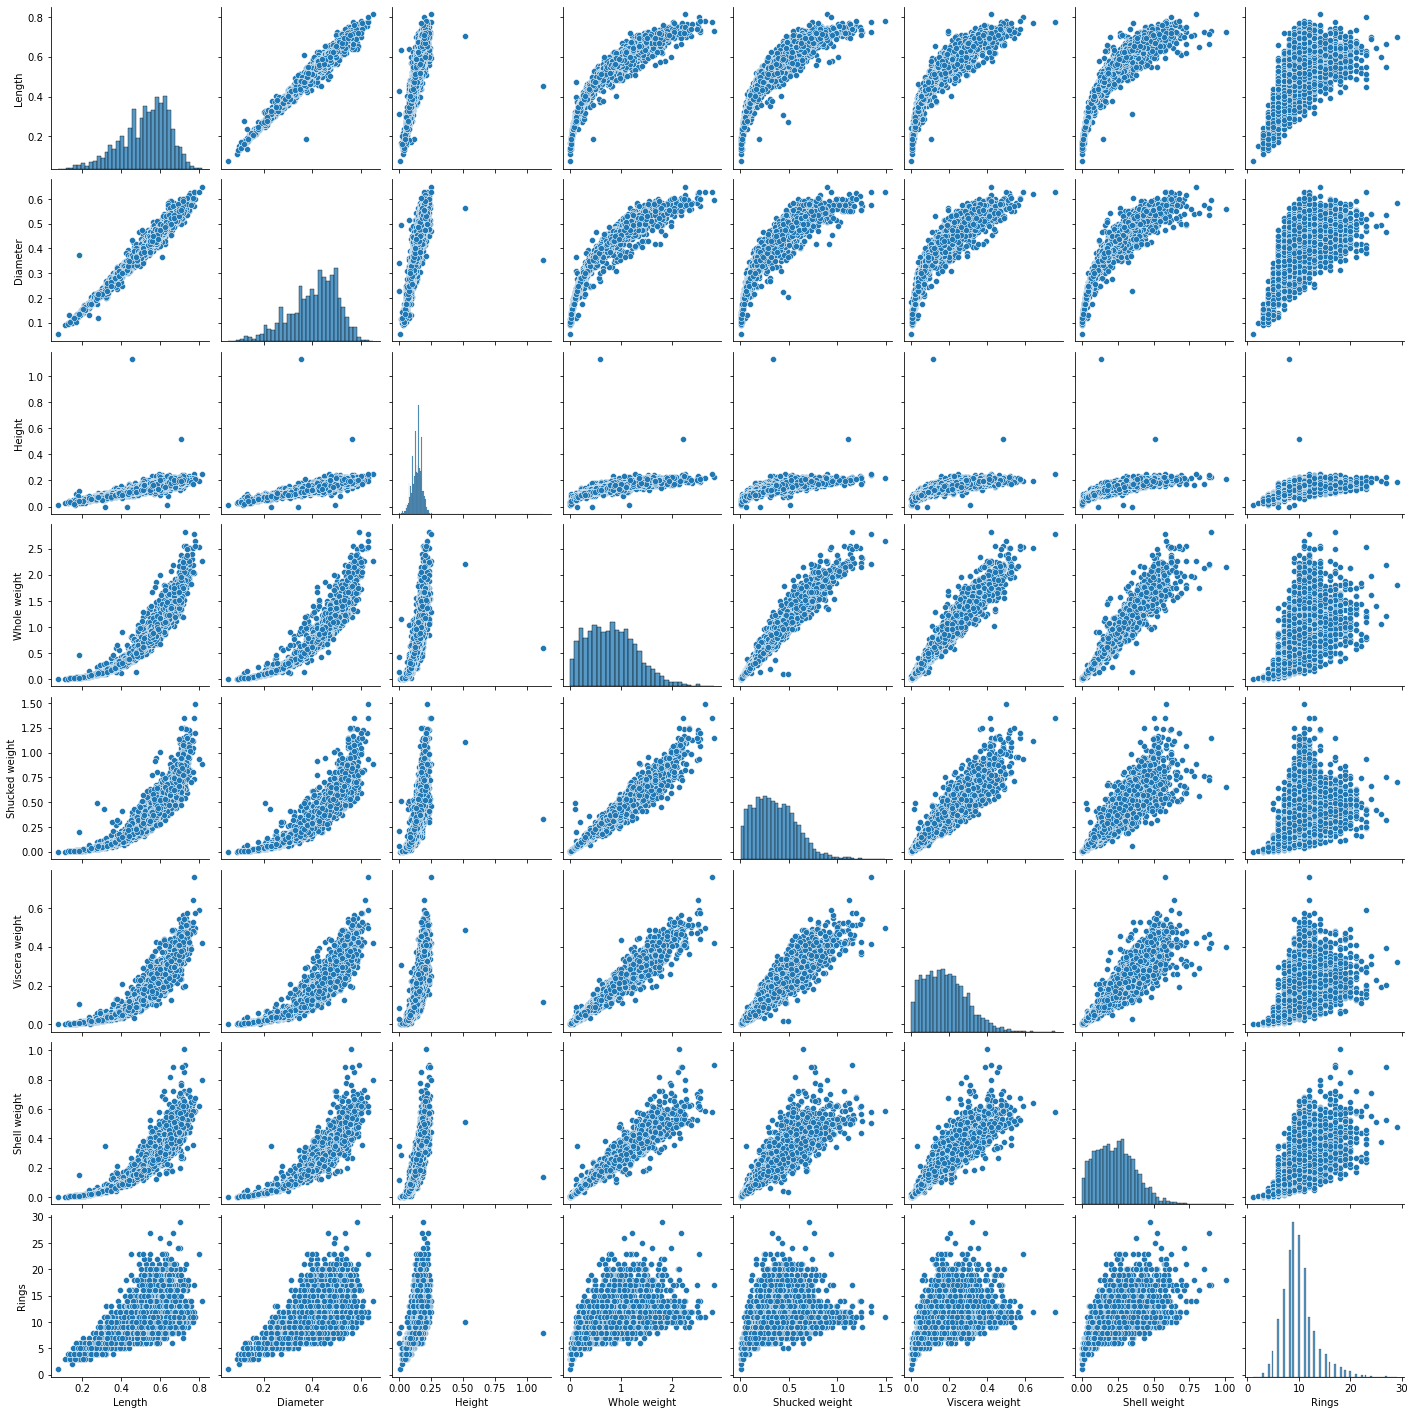

In [10]:
# pairplot

sns.pairplot(data)

In [11]:
# checking the columns of the data

data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot:>

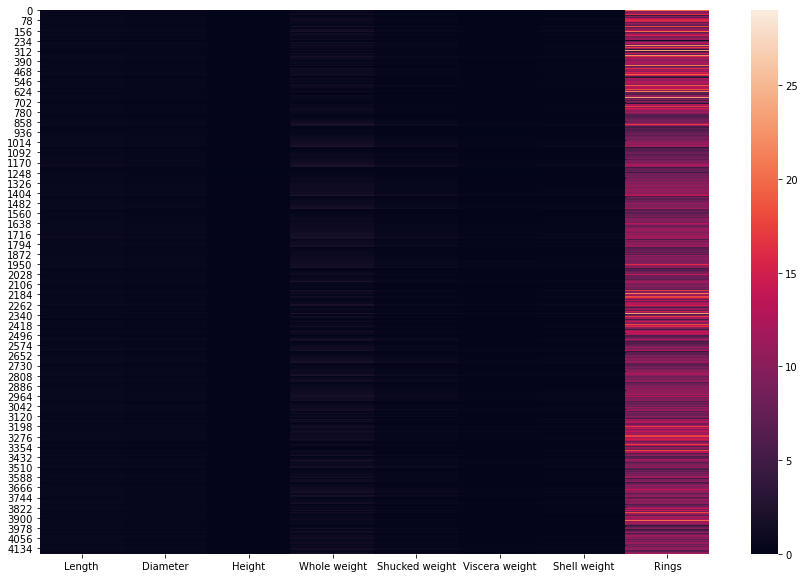

In [12]:
# heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data[[ 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']])

In [13]:
# checkig the values of sex

data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Rings vs length and sex')

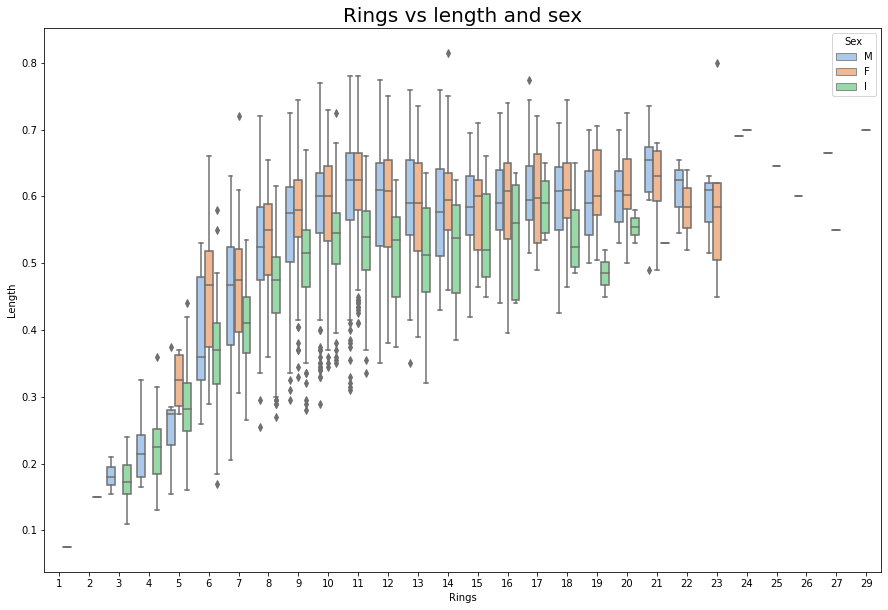

In [14]:
# plotting a hue plot

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(data['Rings'], data['Length'], hue = data['Sex'], palette = 'pastel')
plt.title('Rings vs length and sex', fontsize = 20)

Text(0.5, 1.0, 'Rings vs diameter and sex')

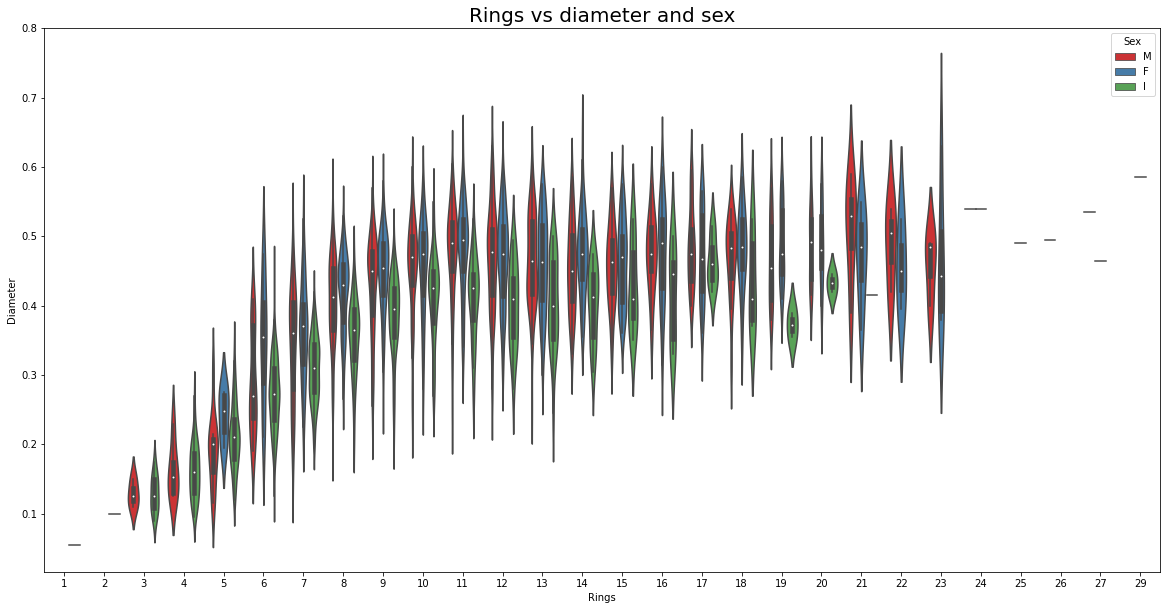

In [15]:
# rings vs diameter and sex

plt.rcParams['figure.figsize'] = (20, 10)
sns.violinplot(data['Rings'], data['Diameter'], hue = data['Sex'], palette = 'Set1')
plt.title('Rings vs diameter and sex', fontsize = 20)

Text(0.5, 1.0, 'Rings vs height and sex')

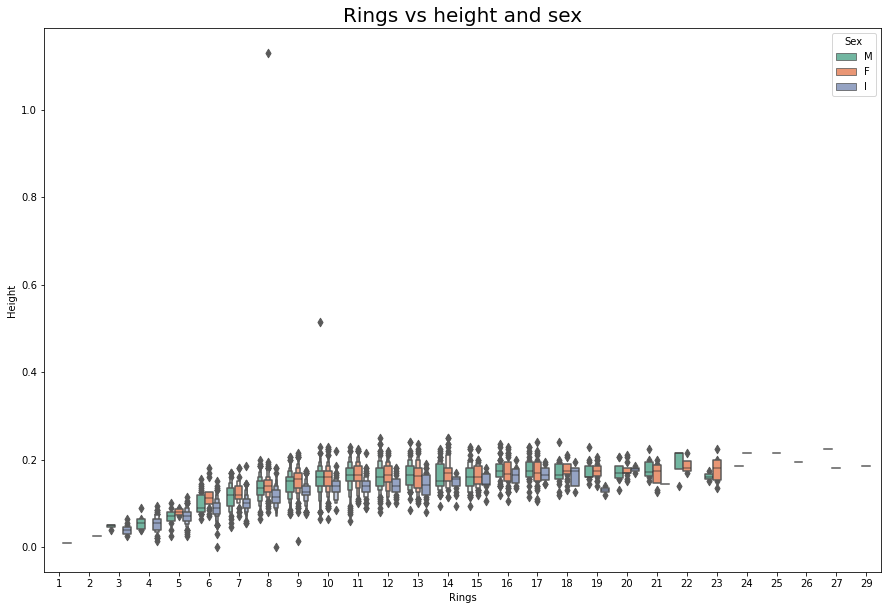

In [16]:
# rings vs height and sex

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxenplot(data['Rings'], data['Height'], hue = data['Sex'], palette = 'Set2')
plt.title('Rings vs height and sex', fontsize = 20)

Text(0.5, 1.0, 'Rings vs weight')

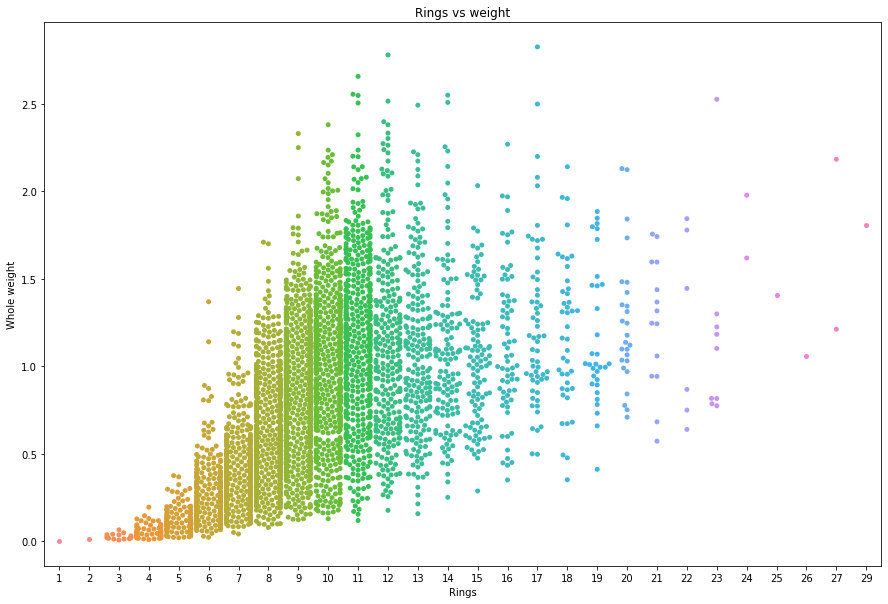

In [17]:
# ring vs weight

plt.rcParams['figure.figsize'] = (15, 10)
sns.swarmplot(data['Rings'], data['Whole weight'])
plt.title('Rings vs weight')

Text(0.5, 1.0, 'Rings vs shucked weight')

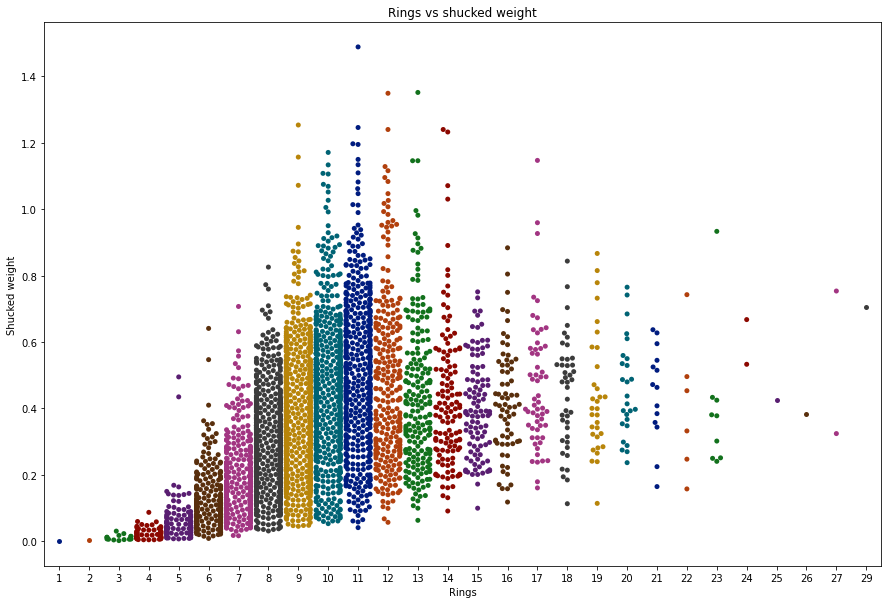

In [18]:
# ring vs shucked weight

plt.rcParams['figure.figsize'] = (15, 10)
sns.swarmplot(data['Rings'], data['Shucked weight'], palette = 'dark')
plt.title('Rings vs shucked weight')

Text(0.5, 1.0, 'Rings vs Viscera Weight')

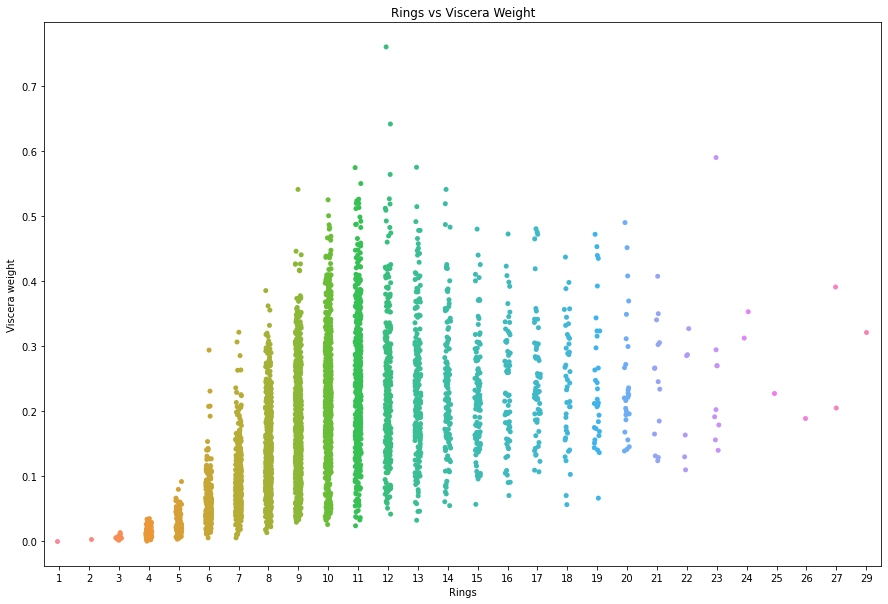

In [19]:
# ring vs viscera weight

plt.rcParams['figure.figsize'] = (15, 10)
sns.stripplot(data['Rings'], data['Viscera weight'])
plt.title('Rings vs Viscera Weight')

Text(0.5, 1.0, 'Rings vs Shell weight')

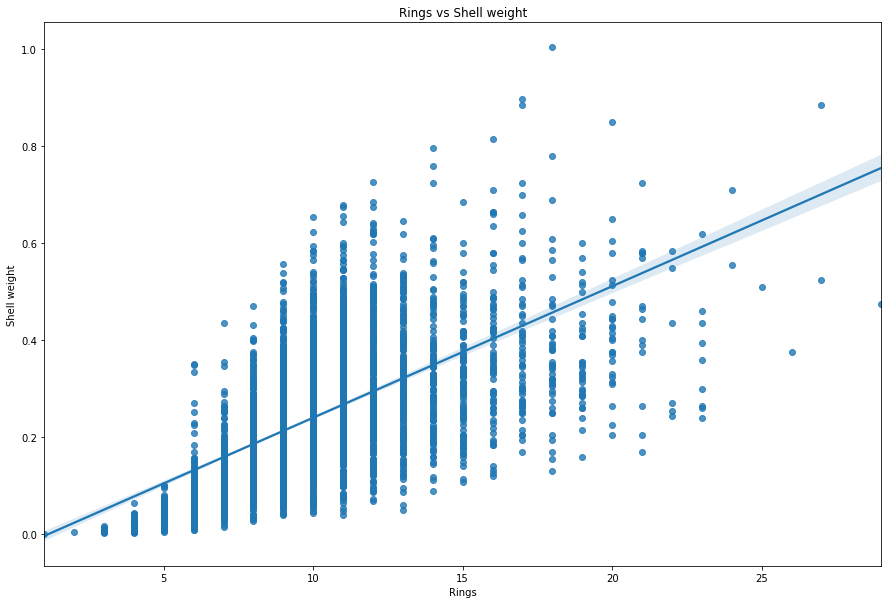

In [20]:
# ring vs shell weight

plt.rcParams['figure.figsize'] = (15, 10)
sns.regplot(data['Rings'], data['Shell weight'])
plt.title('Rings vs Shell weight')

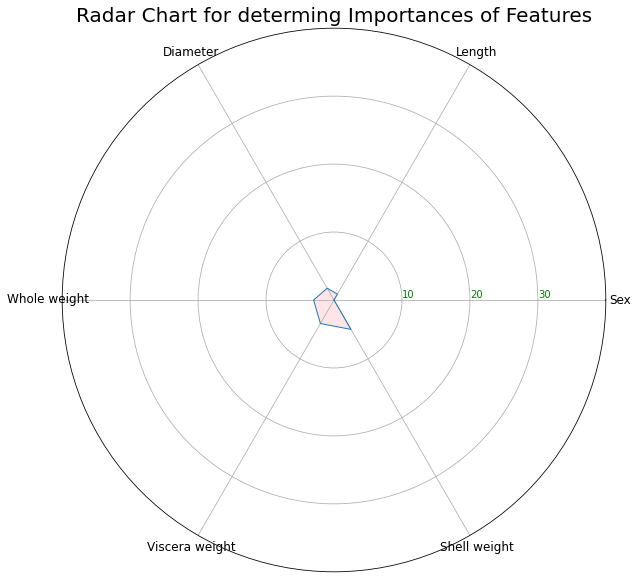

In [21]:
from math import pi

# Set data
df = pd.DataFrame({
'group': [i for i in range(0, 4177)],
'Sex': data['Sex'],
'Length': data['Length'],
'Diameter': data['Diameter'],
'Whole weight':  data['Whole weight'],
'Viscera weight': data['Viscera weight'],
'Shell weight': data['Shell weight']
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='black', size=12)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="green", size=10)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
plt.title('Radar Chart for determing Importances of Features', fontsize = 20) 
# Fill area
ax.fill(angles, values, 'red', alpha=0.1)

In [22]:
'''
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

data['Sex'].value_counts()
'''

data = pd.get_dummies(data)

In [23]:
data

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
5      0.425     0.300   0.095        0.3515          0.1410          0.0775   
6      0.530     0.415   0.150        0.7775          0.2370          0.1415   
7      0.545     0.425   0.125        0.7680          0.2940          0.1495   
8      0.475     0.370   0.125        0.5095          0.2165          0.1125   
9      0.550     0.440   0.150        0.8945          0.3145          0.1510   
10     0.525     0.380   0.140        0.6065          0.1940          0.1475   
11     0.430     0.350   0.110        0.4060          0.1675          0.0810   
12     0.490     0.380   0.135        0.5415          0.2175          0.0950   
13     0.535     0.405   0.145        0.6845          0.2725          0.1710   
14     0.470     0.355   0.100        0.4755          0.1675          0.0805   
15     0.500     0.400   0.130        0.6645          0.2580          0.1330   
16     0.355     0.280   0.085        0.2905          0.0950          0.0395   
17     0.440     0.340   0.100        0.4510          0.1880          0.0870   
18     0.365     0.295   0.080        0.2555          0.0970          0.0430   
19     0.450     0.320   0.100        0.3810          0.1705          0.0750   
20     0.355     0.280   0.095        0.2455          0.0955          0.0620   
21     0.380     0.275   0.100        0.2255          0.0800          0.0490   
22     0.565     0.440   0.155        0.9395          0.4275          0.2140   
23     0.550     0.415   0.135        0.7635          0.3180          0.2100   
24     0.615     0.480   0.165        1.1615          0.5130          0.3010   
25     0.560     0.440   0.140        0.9285          0.3825          0.1880   
26     0.580     0.450   0.185        0.9955          0.3945          0.2720   
27     0.590     0.445   0.140        0.9310          0.3560          0.2340   
28     0.605     0.475   0.180        0.9365          0.3940          0.2190   
29     0.575     0.425   0.140        0.8635          0.3930          0.2270   
30     0.580     0.470   0.165        0.9975          0.3935          0.2420   
31     0.680     0.560   0.165        1.6390          0.6055          0.2805   
32     0.665     0.525   0.165        1.3380          0.5515          0.3575   
33     0.680     0.550   0.175        1.7980          0.8150          0.3925   
34     0.705     0.550   0.200        1.7095          0.6330          0.4115   
35     0.465     0.355   0.105        0.4795          0.2270          0.1240   
36     0.540     0.475   0.155        1.2170          0.5305          0.3075   
37     0.450     0.355   0.105        0.5225          0.2370          0.1165   
38     0.575     0.445   0.135        0.8830          0.3810          0.2035   
39     0.355     0.290   0.090        0.3275          0.1340          0.0860   
40     0.450     0.335   0.105        0.4250          0.1865          0.0910   
41     0.550     0.425   0.135        0.8515          0.3620          0.1960   
42     0.240     0.175   0.045        0.0700          0.0315          0.0235   
43     0.205     0.150   0.055        0.0420          0.0255          0.0150   
44     0.210     0.150   0.050        0.0420          0.0175          0.0125   
45     0.390     0.295   0.095        0.2030          0.0875          0.0450   
46     0.470     0.370   0.120        0.5795          0.2930          0.2270   
47     0.460     0.375   0.120        0.4605          0.1775          0.1100   
48     0.325     0.245   0.070        0.1610          0.0755          0.0255   
49    

In [24]:
# splitting the dependent and independent variables

y = data['Rings']
data = data.drop(['Rings'], axis = 1)
x = data

# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (4177, 10)
Shape of y: (4177,)


In [25]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3341, 10)
Shape of x_test : (836, 10)
Shape of y_train : (3341,)
Shape of y_test : (836,)


In [26]:
# MODELLING
# RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)

RMSE : 2.5358671119696665
R2 Score : 0.4078786566095248


In [27]:
!pip install eli5

In [28]:
# let's check the importance of each attributes


#for purmutation importance
import eli5 
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())